<a href="https://colab.research.google.com/github/shrishtinigam/multilingual_named_entity_recognition/blob/main/Multilingual_Named_Entity_Recognition_For_Indian_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading Datasets

We will be using a subset of the Cross-lingual TRansfer Evaluation of Multilingual Encoders
(XTREME) benchmark called Wikiann or PAN-X. This dataset consists of Wikipedia articles in many
languages.

In [ ]:
from datasets import load_dataset
load_dataset("xtreme", "PAN-X.de", data_dir="data")

Using custom data configuration PAN-X.de-data_dir=data
Reusing dataset xtreme (/root/.cache/huggingface/datasets/xtreme/PAN-X.de-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

To make a representative Indian corpus,
we sample the Hindi, Bengali, Marathi, Telegu, Tamil, and Malyalam corpora from PAN-X according to their spoken proportions.

The fraction of Indian languages (in terms of mother tongue) Hindi, Bengali, Marathi, Telegu, Tamil, and Malyalam spoken are 43.63, 8.03, 6.86, 6.7, 5.7, 2.88. The rest of the % are an assortment of other languages. These percentages can be written as 59.11, 10.88, 9.3, 9.08, 7.73, 3.9 out of 100.


In [ ]:
from collections import defaultdict
from datasets import DatasetDict

langs = ["hi", "bn", "mr", "te", "ta", "ml"]

fracs = [0.5911, 0.1088, 0.093, 0.0908, 0.0773,0.039]

To keep track of each language, we create a Python defaultdict that stores
the language code as the key anda PAN-X corpus of type DatasetDict as the value.
We use the Dataset.shuffle function to make sure we don’t accidentally bias our
dataset splits

In [ ]:
# return a DatasetDict if a key doesn't exist
panx_ch = defaultdict(DatasetDict)
for lang, frac in zip(langs, fracs):
 # load monolingual corpus
 ds = load_dataset("xtreme", f"PAN-X.{lang}", data_dir="data")
 # shuffle and downsample each split according to spoken proportion
 for split in ds.keys():
  panx_ch[lang][split] = (ds[split].shuffle(seed=0).select(range(int(frac * ds[split].num_rows))))

Using custom data configuration PAN-X.hi-data_dir=data
Reusing dataset xtreme (/root/.cache/huggingface/datasets/xtreme/PAN-X.hi-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.hi-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-7ebe027390df5eb4.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.hi-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-bb0b421c0a3761fa.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.hi-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-66efd750fa933d6f.arrow
Using custom data configuration PAN-X.bn-data_dir=data
Reusing dataset xtreme (/root/.cache/huggingface/datasets/xtreme/PAN-X.bn-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.bn-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-72126fd3079ba03a.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.bn-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-19778805ef7eab47.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.bn-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-5aa8f2fdd627098e.arrow
Using custom data configuration PAN-X.mr-data_dir=data
Reusing dataset xtreme (/root/.cache/huggingface/datasets/xtreme/PAN-X.mr-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.mr-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-d3e84f00c5f01d34.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.mr-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-073200643d0dc459.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.mr-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-d1bdab4b8f6d162c.arrow
Using custom data configuration PAN-X.te-data_dir=data
Reusing dataset xtreme (/root/.cache/huggingface/datasets/xtreme/PAN-X.te-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.te-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-ed1d1523561bf4e6.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.te-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-74f014e92fecc80e.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.te-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-99eb8bd729d1b132.arrow
Using custom data configuration PAN-X.ta-data_dir=data
Reusing dataset xtreme (/root/.cache/huggingface/datasets/xtreme/PAN-X.ta-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.ta-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-75424a7c5ce606e3.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.ta-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-2610998ae2b33e6d.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.ta-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-8cae49eb5f299779.arrow
Using custom data configuration PAN-X.ml-data_dir=data
Reusing dataset xtreme (/root/.cache/huggingface/datasets/xtreme/PAN-X.ml-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.ml-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-4e5480d4124375d1.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.ml-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-a58020c09173c32d.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.ml-data_dir=data/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-4c753a2ea3c9d4d5.arrow


Number of examples we have per language:

In [ ]:
import pandas as pd
pd.DataFrame({lang: [panx_ch[lang]["train"].num_rows] for lang in langs},
 index=["Number of training examples"])

,hi,bn,mr,te,ta,ml
Number of training examples,2955,1088,465,90,1159,390


Inspecting one of the examples in the Hindi corpus

In [ ]:
panx_ch["hi"]["train"][0]

{'langs': ['hi', 'hi', 'hi', 'hi', 'hi'],
 'ner_tags': [0, 5, 0, 0, 0],
 'tokens': ['**', 'काहिरा', '(', 'दूतावास', ')']}

In [ ]:
panx_ch["hi"]["train"].features

{'langs': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [ ]:
tags = panx_ch["hi"]["train"].features["ner_tags"].feature
tags

ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)

In [ ]:
tags.str2int("B-PER")

1

In [ ]:
tags.int2str(1)

'B-PER'

We use the ClassLabel.int2str function to create a new column in our training set with class names for
each tag. <br> <br>
We use the Dataset.map function to return a dict with the key corresponding to the new column
name and the value as a list of class names:


In [ ]:
def create_tag_names(batch):
 return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}
panx_hi = panx_ch["hi"].map(create_tag_names)

Parameter 'function'=<function create_tag_names at 0x7f3f1bae8290> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/2955 [00:00<?, ?ex/s]

  0%|          | 0/591 [00:00<?, ?ex/s]

  0%|          | 0/591 [00:00<?, ?ex/s]

In [ ]:
hi_example = panx_hi["train"][35]
df = pd.DataFrame([hi_example["tokens"], hi_example["ner_tags_str"]], ['Tokens', 'Tags'])
df

,0,1,2
Tokens,राजा,मान,सिंह
Tags,B-PER,I-PER,I-PER


Calculating the frequencies of each
entity across each split:


In [ ]:
from itertools import chain
from collections import Counter
split2freqs = {}
for split in panx_hi.keys():
  tag_names = []
  for row in panx_hi[split]["ner_tags_str"]:
    tag_names.append([t.split("-")[1] for t in row if t.startswith("B")])
  split2freqs[split] = Counter(chain.from_iterable(tag_names))
pd.DataFrame.from_dict(split2freqs, orient="index")


,LOC,PER,ORG
train,1196,1331,1063
validation,245,235,234
test,244,257,219


Visualizing how the autotokenizer works

In [ ]:
from transformers import AutoTokenizer
bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

In [ ]:
text = "Jack Sparrow loves New York!"
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

In [ ]:
"".join(xlmr_tokens).replace("▁", " ") #  Unicode symbol U+2581

'<s> Jack Sparrow loves New York!</s>'

## Model Bodies and Heads
The main concept that makes Transformers so versatile is the split of the architecture into a body and head. <br> To switch from the pretraining task to the downstream task, we need to replace the
last layer of the model with one that is suitable for the task. <br> This last layer is called the **model head** and is the part
that is **task specific**. <br> The rest of the model is called the **body** and includes the token embeddings and Transformer
layers that are **task agnostic**.

## Building user-defined XLM-R class for token classification:
We initialize a new model using config_class. This applies the standard XLM-R settings.
<br><br>
The **super()** function calls the initialization function of RobertaPreTrainedModel.
<br><br>
To define our model architecture, we take the model body from RobertaModel and extend it with our own classification head. <br>
Our **classification head** consists of a **dropout** and a **standard feedforward layer**.
<br><br>
We call **init_weights** to initialize all the weights in the model. This function loads the pretrained weights for the model body and randomly initializes the weights of the token classification head.

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.models.roberta.modeling_roberta import (RobertaModel, RobertaPreTrainedModel)
class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
  config_class = XLMRobertaConfig
  def __init__(self, config):
    super().__init__(config)
    self.num_labels = config.num_labels
    # load model body
    self.roberta = RobertaModel(config, add_pooling_layer=False)
    # setup token classification head
    self.dropout = nn.Dropout(config.hidden_dropout_prob)
    self.classifier = nn.Linear(config.hidden_size, config.num_labels)
    # load and initialize weights
    self.init_weights()
  def forward(self, input_ids=None, attention_mask=None,
 token_type_ids=None, labels=None, **kwargs):
    pass


## Forward Pass  
data -> model body -> model head -> dropout layer ->  classification layer -> output

<br>
During the forward pass the data is first fed through the model body.  
<br>
The hidden state, which is part of the model body output, is then fed through the dropout and
classification layer. We calculate the loss.
<br><br>
Finally, we wrap all the outputs in a TokenClassifierOutput object.

In [ ]:
from transformers.modeling_outputs import TokenClassifierOutput
def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
 # use model body to get encoder representations
 outputs = self.roberta(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, **kwargs)
 # apply classifier to encoder representation
 sequence_output = self.dropout(outputs[0])
 logits = self.classifier(sequence_output)
 # calculate losses
 loss = None
 if labels is not None:
  loss_fct = nn.CrossEntropyLoss()
  loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
 # return model output object
 return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states, attentions=outputs.attentions)

In [ ]:
# Updating our placeholder "pass" forward function with our user defined forward function
XLMRobertaForTokenClassification.forward = forward

Tags and the indices that represent them are -
(IOB2 Tagging)

In [ ]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

In [ ]:
index2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

In [ ]:
tag2index

{'B-LOC': 5,
 'B-ORG': 3,
 'B-PER': 1,
 'I-LOC': 6,
 'I-ORG': 4,
 'I-PER': 2,
 'O': 0}

### Loading the XLM-R configuration for NER

In [ ]:
from transformers import AutoConfig
xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,num_labels=tags.num_classes, id2label=index2tag, label2id=tag2index)

Loading weights with the "from_pretrained" function. (Inherited from the RobertaPretrainedModel, not user implemented.)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xlmr_model = (XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name, config=xlmr_config).to(device))

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifie

At this point, technically we can test the predictions. The weights for the model body are from the RobertaModel and the weights for the model head are random. Thus we can see what the pretrained model predicts. Unsuprisingly, it is not very accurate.

In [ ]:
input_ids = xlmr_tokenizer.encode(text, return_tensors="pt").to(device)

In [ ]:
df = pd.DataFrame([xlmr_tokenizer.all_special_tokens,
 xlmr_tokenizer.all_special_ids],
 index=["Special Token", "Special Token ID"])
df

,0,1,2,3,4
Special Token,<s>,</s>,<unk>,<pad>,<mask>
Special Token ID,0,2,3,1,250001


Passing the inputs to the model and extracting the predictions by taking the argmax to get the most
likely class per token

In [ ]:
outputs = xlmr_model(input_ids).logits
predictions = torch.argmax(outputs, dim=-1)
print(f"Number of tokens in sequence: {len(xlmr_tokens)}")
print(f"Shape of outputs: {outputs.shape}")

Number of tokens in sequence: 10
Shape of outputs: torch.Size([1, 10, 7])


Printing those tokens - it is not very accurate.

In [ ]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
df = pd.DataFrame([xlmr_tokens, preds], index=["Tokens", "Tags"])
df

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,B-ORG,B-ORG,B-ORG,B-ORG,B-ORG,B-ORG,B-ORG,I-ORG,B-ORG,B-ORG


Wrapping the above prediction steps into a helper function for later use:

In [ ]:
def tag_text(text, tags, model, tokenizer):
 # get tokens with special characters
 tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(text)))
 # encode the sequence into IDs
 inputs = tokenizer.encode(text, return_tensors="pt").to(device)
 # get predictions as distribution over 7 possible classes
 outputs = model(inputs)[0]
 # take argmax to get most likely class per token
 predictions = torch.argmax(outputs, dim=2)
 # convert to DataFrame
 preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
 df = pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])
 df


## Tokenizing and Encoding the Texts

XLM-R's tokenizer returns the input ID's for the model's inputs. We augment this with attention mask and label ID's to encode the info about **which token is associated with which NER tag.**

In [ ]:
words, labels = hi_example["tokens"], hi_example["ner_tags"]

In [ ]:
tokenized_input = xlmr_tokenizer(hi_example["tokens"], is_split_into_words=True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

In [ ]:
word_ids = tokenized_input.word_ids()
word_ids

[None, 0, 1, 2, None]

 We set -100 as the label for these special tokens and the subwords we wish to mask during training.

In [ ]:
previous_word_idx = None
label_ids = []
for word_idx in word_ids:
  if word_idx is None:
    label_ids.append(-100)
  elif word_idx != previous_word_idx:
    label_ids.append(labels[word_idx])
  else:
    label_ids.append(-100)
  previous_word_idx = word_idx


Scaling this out to the whole dataset by defining the following function -

In [ ]:
def tokenize_and_align_labels(examples):
  tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

  labels = []

  for idx, label in enumerate(examples["ner_tags"]):
    word_ids = tokenized_inputs.word_ids(batch_index=idx)
    previous_word_idx = None
    label_ids = []
    for word_idx in word_ids:
      if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
      else:
        label_ids.append(label[word_idx])
      previous_word_idx = word_idx
    labels.append(label_ids)
  tokenized_inputs["labels"] = labels
  return tokenized_inputs


Verifying our function on a single training example

In [ ]:
single_sample = panx_hi["train"].select(range(1))
single_sample_encoded = single_sample.map(tokenize_and_align_labels, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
""" Decoding the training example from the input_ids"""
print(" ".join(token for token in single_sample[0]["tokens"]))
print(xlmr_tokenizer.decode(single_sample_encoded["input_ids"][0]))

** काहिरा ( दूतावास )
<s> ** काहिरा ( दूतावास )</s>


In [ ]:
original_labels = single_sample["ner_tags_str"][0]
reconstructed_labels = [index2tag[idx] for idx in single_sample_encoded["labels"][0] if idx != -100]
print(original_labels)
print(reconstructed_labels)

['O', 'B-LOC', 'O', 'O', 'O']
['O', 'B-LOC', 'O', 'O', 'O']


Encoding each split

In [ ]:
def encode_panx_dataset(corpus):
  return corpus.map(tokenize_and_align_labels, batched=True, remove_columns=['langs', 'ner_tags', 'tokens'])

In [ ]:
panx_hi_encoded = encode_panx_dataset(panx_ch["hi"])
panx_hi_encoded["train"]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 2955
})

### Performance Measures
seqeval is a Python framework for sequence labeling evaluation. seqeval can evaluate the performance of chunking tasks such as named-entity recognition, part-of-speech tagging, semantic role labeling etc.

<br>

Precision <br> Recall <br> F1-score

In [ ]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Testing out the library -

In [ ]:
from seqeval.metrics import classification_report
y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"], ["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"], ["B-PER", "I-PER", "O"]]
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



So, we make a function that can take the outputs of the model and convert them into lists that seqeval can expect.

In [ ]:
import numpy as np
def align_predictions(predictions, label_ids):
  preds = np.argmax(predictions, axis=2)
  batch_size, seq_len = preds.shape
  labels_list, preds_list = [], []
  for batch_idx in range(batch_size):
    example_labels, example_preds = [], []
    for seq_idx in range(seq_len):
  # ignore label IDs = -100
      if label_ids[batch_idx, seq_idx] != -100:
        example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
        example_preds.append(index2tag[preds[batch_idx][seq_idx]])
    labels_list.append(example_labels)
    preds_list.append(example_preds)
  return preds_list, labels_list

## Fine Tuning XLM-RoBERTa

Our first strategy will be to fine-tune our base model on
the German subset of PAN-X and then evaluate it’s zero-shot cross-lingual performance on French, Italian, and
English

F1 Score = (2 * Precision * Recall) / (Precision + Recall)

In [ ]:
!sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
#!huggingface-cli login

In [ ]:
#!git config --global credential.helper store

In [ ]:
from transformers import TrainingArguments
num_epochs = 3
batch_size = 24
logging_steps = len(panx_hi_encoded["train"]) // batch_size
training_args = TrainingArguments(
    #hub_token="USE YOUR TOKEN",
    #push_to_hub=True,
    output_dir="xlm-roberta-base-finetuned-panx-hi",
 num_train_epochs=num_epochs,
 per_device_train_batch_size=batch_size,
 per_device_eval_batch_size=batch_size,
 evaluation_strategy="epoch", save_steps=1e6,
 weight_decay=0.01, disable_tqdm=False,
 logging_steps=logging_steps)

In [ ]:
from seqeval.metrics import f1_score
def compute_metrics(eval_pred):
 y_pred, y_true = align_predictions(eval_pred.predictions,
 eval_pred.label_ids)
 return {"f1": f1_score(y_true, y_pred)}

Training took approximately 1 hours

In [ ]:
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [ ]:
from transformers import Trainer
trainer = Trainer(model=xlmr_model, args=training_args,
 data_collator=data_collator, compute_metrics=compute_metrics,
 train_dataset=panx_hi_encoded["train"],
 eval_dataset=panx_hi_encoded["validation"],
 tokenizer=xlmr_tokenizer)


In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 2955
  Num Epochs = 3
  Instantaneous batch size per device = 24
  Total train batch size (w. parallel, distributed & accumulation) = 24
  Gradient Accumulation steps = 1
  Total optimization steps = 372


Epoch,Training Loss,Validation Loss,F1
1,0.702700,0.381607,0.774862
2,0.294400,0.332595,0.801394
3,0.206500,0.289447,0.818308


***** Running Evaluation *****
  Num examples = 591
  Batch size = 24
***** Running Evaluation *****
  Num examples = 591
  Batch size = 24
***** Running Evaluation *****
  Num examples = 591
  Batch size = 24


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=372, training_loss=0.39850540903787457, metrics={'train_runtime': 3639.5764, 'train_samples_per_second': 2.436, 'train_steps_per_second': 0.102, 'total_flos': 146365972341930.0, 'train_loss': 0.39850540903787457, 'epoch': 3.0})

Saving the model in huggingface

In [ ]:
!git lfs install

In [ ]:
!git config --global user.email "mehershrishtinigam@gmail.com"

In [ ]:
!git config --global user.name "shrishtinigam"

In [ ]:
trainer.save_model("")

In [ ]:
!ls

In [ ]:
!cd xlm-roberta-base-finetuned-panx-hi

In [ ]:
!git add .
!git commit -m "Initial commit"
!git push

To test our model works, lets test it on the Hindi translation of the simple example -

In [ ]:
text_de = "जेफ डीन कैलिफोर्निया में एप्पल में कंप्यूटर साइंस इंजीनियर हैं"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

## Error Analysis

In [ ]:
!pip install datasets transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.models.roberta.modeling_roberta import (RobertaModel, RobertaPreTrainedModel)
class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
  config_class = XLMRobertaConfig
  def __init__(self, config):
    super().__init__(config)
    self.num_labels = config.num_labels
    # load model body
    self.roberta = RobertaModel(config, add_pooling_layer=False)
    # setup token classification head
    self.dropout = nn.Dropout(config.hidden_dropout_prob)
    self.classifier = nn.Linear(config.hidden_size, config.num_labels)
    # load and initialize weights
    self.init_weights()
  def forward(self, input_ids=None, attention_mask=None,
 token_type_ids=None, labels=None, **kwargs):
    pass


In [ ]:
#xlmr_model = (XLMRobertaForTokenClassification
 #.from_pretrained("models/xlm-roberta-base-finetuned-panx-hi")
 #.to(device))

Iterating over validation set

In [ ]:
from torch.nn.functional import cross_entropy
def forward_pass_with_label(batch):
  # convert dict of lists to list of dicts
  features = [dict(zip(batch, t)) for t in zip(*batch.values())]
  # pad inputs and labels
  batch = data_collator(features)
  input_ids = batch["input_ids"].to(device)
  attention_mask = batch["attention_mask"].to(device)
  labels = batch["labels"].to(device)
  with torch.no_grad():
    output = xlmr_model(input_ids, attention_mask)
    batch["predicted_label"] = torch.argmax(output.logits, axis=-1)
  loss = cross_entropy(output.logits.view(-1, 7),
  labels.view(-1), reduction="none")
  loss = loss.view(len(input_ids), -1)
  batch["loss"] = loss
  # datasets requires list of NumPy array data types
  for k, v in batch.items():
    batch[k] = v.cpu().numpy()
  return batch

In [ ]:
valid_set = panx_hi_encoded["validation"]
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
valid_set.set_format("pandas")
df = valid_set[:]

  0%|          | 0/19 [00:00<?, ?ba/s]

Labels are encoded with their ID's so we convert them to strings to make it easier to read results.

In [ ]:
index2tag[-100] = "IGN"
df["input_tokens"] = df["input_ids"].apply(
 lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))
df["predicted_label"] = df["predicted_label"].apply(
 lambda x: [index2tag[i] for i in x])
df["labels"] = df["labels"].apply(lambda x: [index2tag[i] for i in x])

In [ ]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens["loss"] = df_tokens["loss"].astype(float)

In [ ]:
(
 df_tokens.groupby("input_tokens")[["loss"]]
 .agg(["count", "mean", "sum"])
 .droplevel(level=0, axis=1) # get rid of multi-level columns
 .sort_values(by="sum", ascending=False)
 .reset_index()
 .head(20)
)


,input_tokens,count,mean,sum
0,▁,287,0.417175,119.729344
1,▁),111,0.480044,53.284899
2,▁(,111,0.450993,50.060272
3,▁का,39,0.437247,17.052645
4,▁र,17,0.722576,12.283786
5,▁टो,4,2.996899,11.987597
6,▁उत्तर,11,1.036632,11.402950
7,▁के,43,0.265054,11.397310
8,▁और,31,0.335929,10.413791
9,▁जम्मू,6,1.735398,10.412389


In [ ]:
df_tokens.query("input_tokens == '_West'")["labels"].value_counts()

Series([], Name: labels, dtype: int64)

In [ ]:
(
 df_tokens.groupby("labels")[["loss"]]
 .agg(["count", "mean", "sum"])
 .droplevel(level=0, axis=1)
 .sort_values(by="mean", ascending=False)
 .reset_index()
)

,labels,count,mean,sum
0,I-LOC,261,0.655050,170.968167
1,B-ORG,234,0.539044,126.136286
2,B-LOC,245,0.456959,111.954978
3,I-ORG,652,0.413961,269.902336
4,I-PER,349,0.348756,121.715768
5,B-PER,235,0.233775,54.937106
6,O,1476,0.100599,148.483619


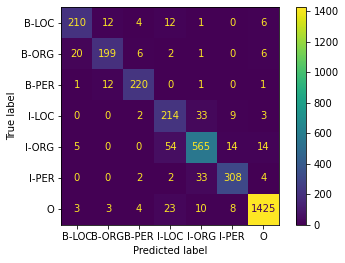

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(df_tokens["labels"], df_tokens["predicted_label"])

In [ ]:
def display_samples(df):
  for _, row in df.iterrows():
    labels, preds, tokens, losses = [], [], [], []
    for i, mask in enumerate(row["attention_mask"]):
      if mask == 1:
        labels.append(row["labels"][i])
        preds.append(row["predicted_label"][i])
        tokens.append(row["input_tokens"][i])
        losses.append(f"{row['loss'][i]:.2f}")
      df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels,"preds": preds, "losses": losses}).T
      df_tmp

In [ ]:
df["total_loss"] = df["loss"].apply(sum)
display_samples(df.sort_values(by="total_loss", ascending=False).head(3))

In [ ]:
display_samples(df.loc[df["input_tokens"].apply(lambda x: "_(" in x)].head(3))

In [ ]:
panx_hi_encoded["validation"].reset_format()
preds_valid = trainer.predict(panx_hi_encoded["validation"])

***** Running Prediction *****
  Num examples = 591
  Batch size = 24


In [ ]:
preds_valid.metrics

{'test_f1': 0.8183079056865464,
 'test_loss': 0.2894473373889923,
 'test_runtime': 63.6176,
 'test_samples_per_second': 9.29,
 'test_steps_per_second': 0.393}

In [ ]:
def generate_report(trainer, dataset):
 preds = trainer.predict(dataset)
 preds_list, label_list = align_predictions(preds.predictions, preds.label_ids)
 print(classification_report(label_list, preds_list, digits=4))
 print(preds.metrics)
 return 1 #preds.metrics["eval_f1"]

In [ ]:
from collections import defaultdict
f1_scores = defaultdict(dict)
f1_scores["hi"]["hi"] = generate_report(trainer, panx_hi_encoded["test"])

***** Running Prediction *****
  Num examples = 591
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.7572    0.7541    0.7556       244
         ORG     0.7817    0.8174    0.7991       219
         PER     0.8792    0.9066    0.8927       257

   micro avg     0.8087    0.8278    0.8181       720
   macro avg     0.8060    0.8260    0.8158       720
weighted avg     0.8082    0.8278    0.8178       720

{'test_loss': 0.260969340801239, 'test_f1': 0.8181194234728894, 'test_runtime': 59.5172, 'test_samples_per_second': 9.93, 'test_steps_per_second': 0.42}


In [ ]:
text_fr = "जेफ डीन कैलिफोर्निया में एप्पल में कंप्यूटर साइंस इंजीनियर हैं"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

In [ ]:
def evaluate_zero_shot_performance(lang, trainer):
 panx_ds = encode_panx_dataset(panx_ch[lang])
 return generate_report(trainer, panx_ds["test"])
f1_scores["hi"]["ta"] = evaluate_zero_shot_performance("ta", trainer)

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

***** Running Prediction *****
  Num examples = 77
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.6667    0.6000    0.6316        30
         ORG     0.4667    0.6364    0.5385        22
         PER     0.7857    0.8049    0.7952        41

   micro avg     0.6566    0.6989    0.6771        93
   macro avg     0.6397    0.6804    0.6551        93
weighted avg     0.6718    0.6989    0.6817        93

{'test_loss': 0.3556075990200043, 'test_f1': 0.6770833333333334, 'test_runtime': 7.863, 'test_samples_per_second': 9.793, 'test_steps_per_second': 0.509}


In [ ]:
f1_scores["hi"]["mr"] = evaluate_zero_shot_performance("mr", trainer)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

***** Running Prediction *****
  Num examples = 93
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.7708    0.8222    0.7957        45
         ORG     0.6111    0.7097    0.6567        31
         PER     0.9091    0.9091    0.9091        33

   micro avg     0.7607    0.8165    0.7876       109
   macro avg     0.7637    0.8137    0.7872       109
weighted avg     0.7673    0.8165    0.7905       109

{'test_loss': 0.30446186661720276, 'test_f1': 0.7876106194690266, 'test_runtime': 14.1795, 'test_samples_per_second': 6.559, 'test_steps_per_second': 0.282}


In [ ]:
f1_scores["hi"]["bn"] = evaluate_zero_shot_performance("bn", trainer)

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

***** Running Prediction *****
  Num examples = 108
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.7838    0.6042    0.6824        48
         ORG     0.6038    0.7805    0.6809        41
         PER     0.5556    0.7407    0.6349        27

   micro avg     0.6429    0.6983    0.6694       116
   macro avg     0.6477    0.7085    0.6660       116
weighted avg     0.6670    0.6983    0.6708       116

{'test_loss': 0.7471949458122253, 'test_f1': 0.6694214876033058, 'test_runtime': 11.6737, 'test_samples_per_second': 9.252, 'test_steps_per_second': 0.428}
